# SVM Lab 1 : Loading Dataset

1)Download Dataset from here: htttps://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
2)Browse into the working directory, save the .csv data file into the directory,
3)Open Jupyter notebook>
 import pandas and numpy
 load the data using read_csv("location of the file",column headers and seperators)
4)Visualise your data using matplotlib 
import libraries matplotlib and math 
plot and visualize the data for better understanding
5)Use sklearn preprocessing library for encoding labels to numeric values since it becomes easier to process the data for columns Occupation and Target




In [81]:
import pandas as pd
import numpy as np

In [61]:
pwd    

'C:\\Users\\ASUS\\Desktop'

In [62]:
original_data=pd.read_csv(r"D:\Guvi Datascience\adult.csv",
                          names=[
                              "Age","Workclass","fnfgt","Education","Education-Num","Marital Status","Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss","Hours per week","Country","Target"],sep=r'\s*,\s*',engine='python',na_values="?")
original_data.head()

,Age,Workclass,fnfgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
import matplotlib.pyplot as plt
import math
%matplotlib inline


C:\Users\ASUS\AppData\Local\Temp/ipykernel_8472/3528293995.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if original_data.dtypes[column]==np.object:
C:\Users\ASUS\AppData\Local\Temp/ipykernel_8472/3528293995.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if original_data.dtypes[column]==np.object:
C:\Users\ASUS\AppData\Local\Temp/ipykernel_8472/3528293995.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning

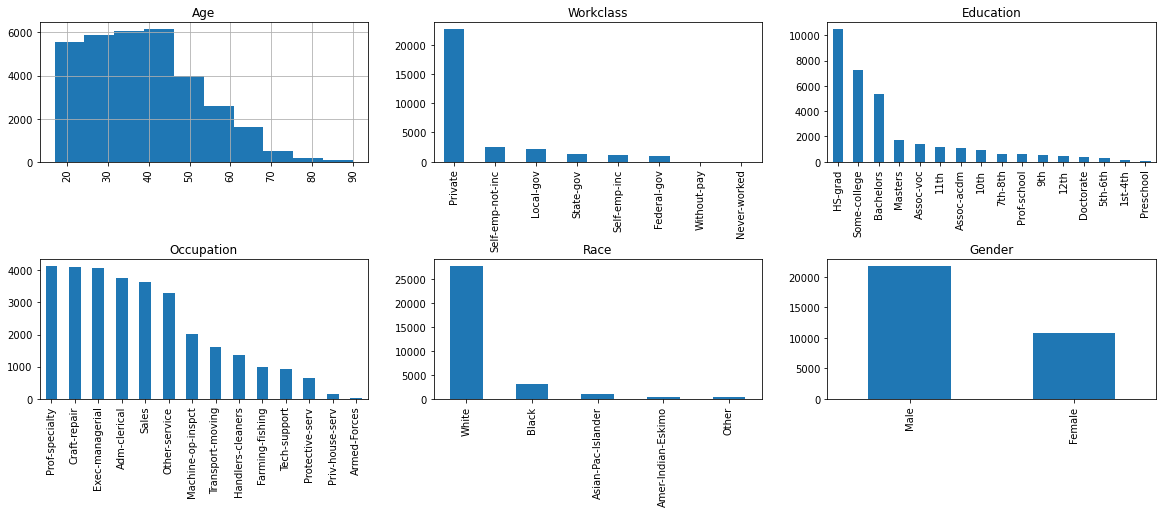

In [64]:
fig=plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(original_data.shape[1])/cols)

for i,column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if original_data.dtypes[column]==np.object:
        original_data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()

In [65]:
#Use LabelEncoder to transform text to numbers
import sklearn.preprocessing as preprocessing 
le=preprocessing.LabelEncoder()
original_data['Occupation']=le.fit_transform(original_data['Occupation'].astype(str))
original_data.head()

,Age,Workclass,fnfgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,<=50K


In [66]:
original_data['Target']=le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnfgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


In [67]:
original_data.Target.unique()

array([0, 1])

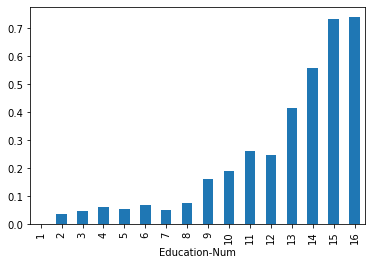

In [68]:
original_data.groupby("Education-Num").Target.mean().plot(kind='bar')
plt.show()

# Building and Tweaking our SVM Classification model


1)Import Sklearn library for training the model using the dataset
2)Assign x variable for Education and Occupation Columnns and Y as Target
3) Split the data into 80% training and 20% testing, We will come across on why we do this later in the Course
4)use SVC (Support Vector Classifier) to train the data.
5) Use score() to test the accuracy of the model against the test data.
6)Use seaborn to create a corelation matrix to view the relation between each of the fields.
We will use this to identify the corelation between Target fields and the rest of the fields.
Plot the heatmap.
7)We are unable to see the non Numeric fields in the heat map.
Use label encoders to convert rest of the field to numeric values.
8)Recreate the heatmap with correlation matrix with numeric values, Add annot=True and fmt= '.2f' 
9)Retrain the Model after observing the heatmap and adding features to improve accuracy of the model.
10)Alternately We will try and train data using SVC() using Kernels RBF with C=1 and C=10 and observe the difference in accuracy, We shall dive in in deeper in the overfitting Section
11)Also we will try and train using linear kernels and observe the accuracy.



In [69]:
#SVM-Building and Tweaking our SVM Classification mode
from sklearn.model_selection import train_test_split
#taking only the features that is important for now
x=original_data[['Education-Num','Occupation']]
y=original_data['Target']

#Splitting into 80% for  training set and 20% for testing set so we can see our accuracy
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [70]:
from sklearn.svm import SVC
#Declaring the SVC with no tuning
classifier=SVC()

#Fitting the data. This is where the SVM will learn
classifier.fit(x_train,y_train)

#Predicting the result and giving the accuracy 
score=classifier.score(x_test,y_test)

print(score)

0.7861200675571933


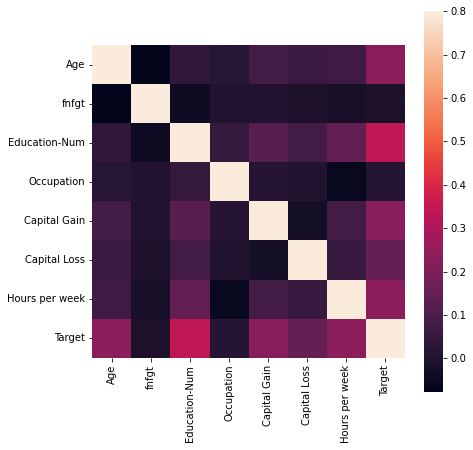

In [71]:
#Correlation matrix
import seaborn as sns

corrmat=original_data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()
#only fields with numeric values will show up in correlation matrix

In [72]:
#Convert potential relevant fields to have numeric values
original_data['Race']=le.fit_transform(original_data['Race'].astype(str))
original_data['Gender']=le.fit_transform(original_data['Gender'].astype(str))
original_data['Marital Status']=le.fit_transform(original_data['Marital Status'].astype(str))
original_data['Education']=le.fit_transform(original_data['Education'].astype(str))

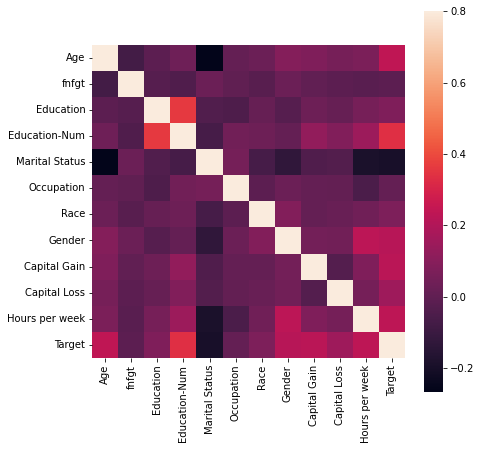

In [73]:
corrmat=original_data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

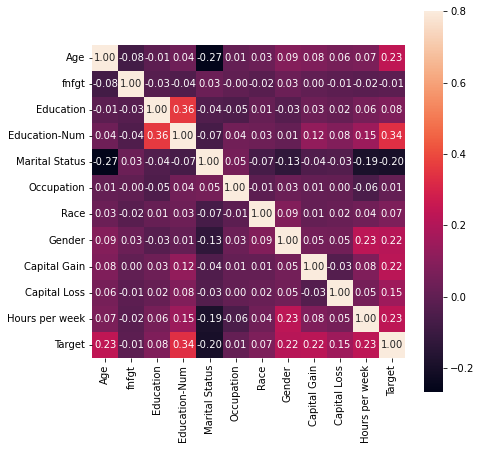

In [74]:
#To get the actual correlation values, annotate the heatmap
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')
plt.show()

In [75]:
#Resetting features
x=original_data[['Education-Num','Occupation','Age','Gender']]

#Splitting training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
classifier= SVC()

classifier.fit(x_train,y_train)

score=classifier.score(x_test,y_test)
print(score)

0.7953324120988792


In [76]:
#setting our kernel to radical basis function with penalty parameter C=1.0
classifier=SVC(kernel='rbf',C=1.0)
classifier.fit(x_train,y_train)

score=classifier.score(x_test,y_test)
print(score)

0.7953324120988792


In [77]:
#Hyper parameter Tuning
classifier=SVC(kernel='rbf',C=10.0)
classifier.fit(x_train,y_train)

score=classifier.score(x_test,y_test)
print(score)

0.7968678028558268


In [80]:
#Let us now try a linear kernel
classifier=SVC(kernel='rbf',C=1.0)
classifier.fit(x_train,y_train)

score=classifier.score(x_test,y_test)
print(score)

0.7953324120988792
